In [1]:
import os
import sys
import joblib
from catboost import CatBoostClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
notebook_dir = os.path.abspath("..")
if notebook_dir not in sys.path:
    sys.path.append(notebook_dir)


from credit_models import modelValuation
from data_loader import load_and_prepare_data



In [2]:
rf_model = joblib.load(r"D:\Projects\CreditWorthinessModel\TestModels\my_random_forest_model1.pkl")

cb_model = CatBoostClassifier()
cb_model.load_model(r"D:\Projects\CreditWorthinessModel\TestModels\my_catboost_model1.cbm")

lgb_model = joblib.load(r"D:\Projects\CreditWorthinessModel\TestModels\my_lightgbm_model1.pkl")

Data_Path = r"C:\Users\KrishnaWali\Downloads\german_credit_synthetic_test_500.csv"

In [3]:
X_lgb , Y_lgb = load_and_prepare_data("lightgbm" , return_split= False , data_path= Data_Path)
X_rf , Y_rf = load_and_prepare_data("randomforest" , return_split= False , data_path= Data_Path)
X_cat , Y_cat , cat_features = load_and_prepare_data("catboost" , return_split= False , data_path= Data_Path)
X_tab , Y_tab, cat_idxs , cat_dims = load_and_prepare_data("tabnet" , return_split= False , data_path= Data_Path)


[⚙️ LightGBM] Using Default Threshold = 0.5

🔍 [LightGBM] Classification Report @ Threshold = 0.5
                 precision    recall  f1-score   support

Good Credit (0)       0.72      0.67      0.69       250
 Bad Credit (1)       0.69      0.74      0.71       250

       accuracy                           0.70       500
      macro avg       0.71      0.70      0.70       500
   weighted avg       0.71      0.70      0.70       500

🧠 Explanation of Key Metrics:
- Precision (Good Credit): 0.72 → 72% of those predicted as good credit were correct.
- Recall (Good Credit)   : 0.67 → 67% of all actual good credits were correctly identified.
- Precision (Bad Credit) : 0.69 → 69% of those predicted as bad credit were correct.
- Recall (Bad Credit)    : 0.74 → 74% of all actual bad credits were correctly identified.
- Accuracy               : 0.70 → 70% of all predictions were correct.
- ROC-AUC                : 0.78 → Model distinguishes good vs. bad credit with 78% confidence.


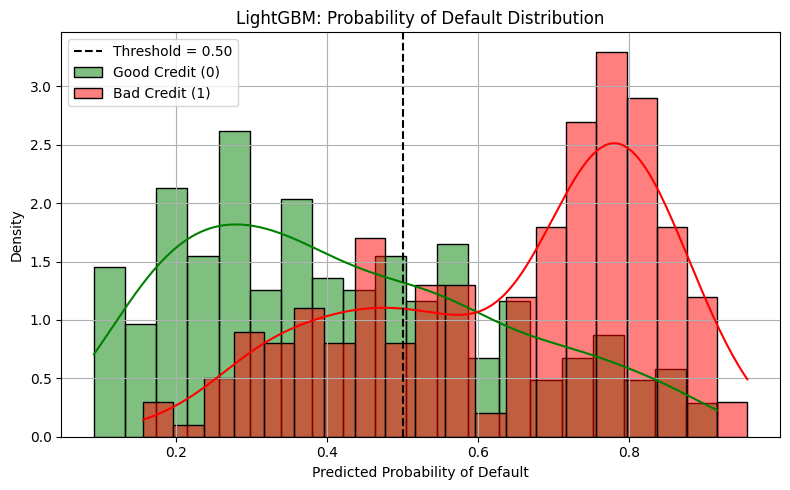

(array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 

In [4]:
y_proba_lgb = lgb_model.predict_proba(X_lgb)[:, 1]
modelValuation("LightGBM", Y_lgb, y_proba_lgb)


[⚙️ Random Forest] Using Default Threshold = 0.5

🔍 [Random Forest] Classification Report @ Threshold = 0.5
                 precision    recall  f1-score   support

Good Credit (0)       0.74      0.77      0.75       250
 Bad Credit (1)       0.76      0.72      0.74       250

       accuracy                           0.75       500
      macro avg       0.75      0.75      0.75       500
   weighted avg       0.75      0.75      0.75       500

🧠 Explanation of Key Metrics:
- Precision (Good Credit): 0.74 → 74% of those predicted as good credit were correct.
- Recall (Good Credit)   : 0.77 → 77% of all actual good credits were correctly identified.
- Precision (Bad Credit) : 0.76 → 76% of those predicted as bad credit were correct.
- Recall (Bad Credit)    : 0.72 → 72% of all actual bad credits were correctly identified.
- Accuracy               : 0.75 → 75% of all predictions were correct.
- ROC-AUC                : 0.83 → Model distinguishes good vs. bad credit with 83% confiden

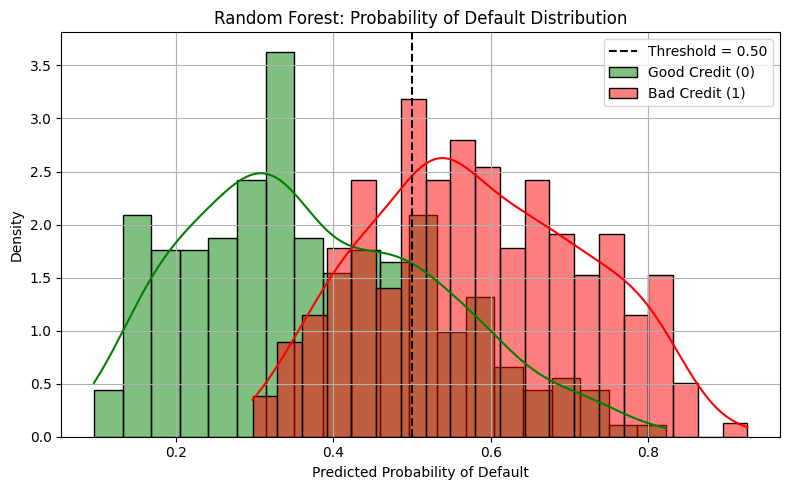

(array([0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 

In [6]:
y_proba_rf = rf_model.predict_proba(X_rf)[:, 1]
modelValuation("Random Forest", Y_rf, y_proba_rf)



[⚙️ CatBoost] Using Default Threshold = 0.5

🔍 [CatBoost] Classification Report @ Threshold = 0.5
                 precision    recall  f1-score   support

Good Credit (0)       0.71      0.76      0.73       250
 Bad Credit (1)       0.74      0.69      0.71       250

       accuracy                           0.72       500
      macro avg       0.72      0.72      0.72       500
   weighted avg       0.72      0.72      0.72       500

🧠 Explanation of Key Metrics:
- Precision (Good Credit): 0.71 → 71% of those predicted as good credit were correct.
- Recall (Good Credit)   : 0.76 → 76% of all actual good credits were correctly identified.
- Precision (Bad Credit) : 0.74 → 74% of those predicted as bad credit were correct.
- Recall (Bad Credit)    : 0.69 → 69% of all actual bad credits were correctly identified.
- Accuracy               : 0.72 → 72% of all predictions were correct.
- ROC-AUC                : 0.79 → Model distinguishes good vs. bad credit with 79% confidence.


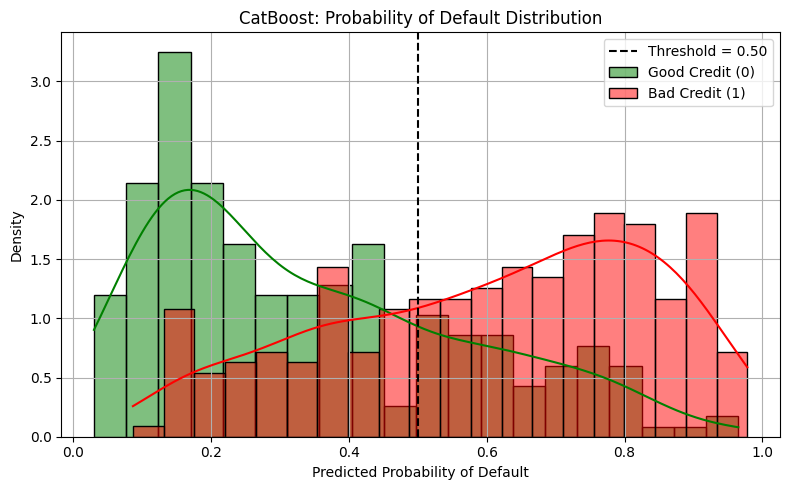

(array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 

In [9]:
y_proba_cat = cb_model.predict_proba(X_cat)[:, 1]
modelValuation("CatBoost", Y_cat, y_proba_cat)


c:\Users\KrishnaWali\AppData\Local\Programs\Python\Python310\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")



[⚙️ TabNet] Using Default Threshold = 0.5

🔍 [TabNet] Classification Report @ Threshold = 0.5
                 precision    recall  f1-score   support

Good Credit (0)       0.67      0.69      0.68       250
 Bad Credit (1)       0.68      0.66      0.67       250

       accuracy                           0.67       500
      macro avg       0.67      0.67      0.67       500
   weighted avg       0.67      0.67      0.67       500

🧠 Explanation of Key Metrics:
- Precision (Good Credit): 0.67 → 67% of those predicted as good credit were correct.
- Recall (Good Credit)   : 0.69 → 69% of all actual good credits were correctly identified.
- Precision (Bad Credit) : 0.68 → 68% of those predicted as bad credit were correct.
- Recall (Bad Credit)    : 0.66 → 66% of all actual bad credits were correctly identified.
- Accuracy               : 0.67 → 67% of all predictions were correct.
- ROC-AUC                : 0.73 → Model distinguishes good vs. bad credit with 73% confidence.


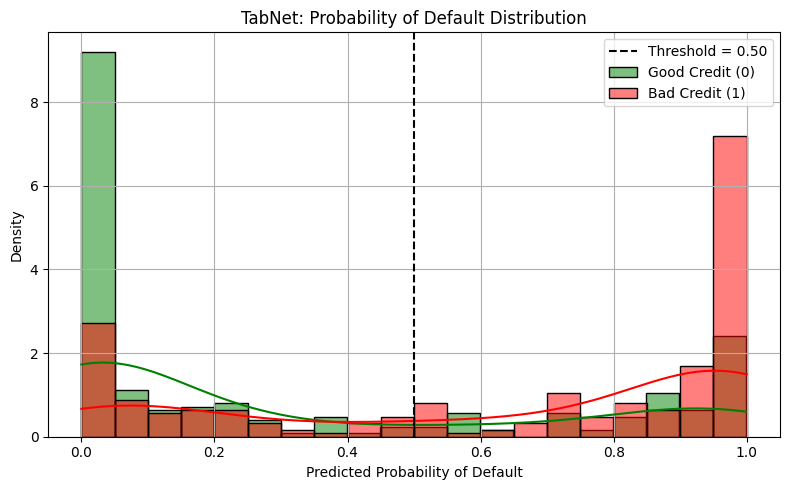

(array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 

In [11]:
tabnet_model = TabNetClassifier()
tabnet_model.load_model(r"D:\Projects\CreditWorthinessModel\TestModels\tabnet_model.zip.zip")

y_proba_tab = tabnet_model.predict_proba(X_tab)[:, 1]
modelValuation("TabNet", Y_tab, y_proba_tab)
